In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [26]:
df1 = pd.read_csv('LBMA-SILVER.csv')
stock=df1

In [27]:
stock.head(10)

,Date,USD,GBP,EURO
0,2022-06-13,21.560,17.68,20.60
1,2022-06-10,21.590,17.35,20.38
2,2022-06-09,21.930,17.50,20.46
3,2022-06-08,21.920,17.49,20.45
4,2022-06-07,22.090,17.68,20.70
5,2022-06-06,22.255,17.73,20.75
6,2022-06-01,21.610,17.17,20.16
7,2022-05-31,21.770,17.29,20.35
8,2022-05-30,22.035,17.43,20.45
9,2022-05-27,22.275,17.69,20.82


# Data preprocessing

In [28]:
stock['Date'].min()

'1968-01-02'

In [29]:
stock['Date'].max()

'2022-06-13'

In [30]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

In [31]:
stock.isnull().sum()

Date       0
USD       19
GBP        0
EURO    7847
dtype: int64

In [32]:
stock = stock.groupby('Date')['GBP'].sum().reset_index()

In [33]:
stock.head()

,Date,GBP
0,1968-01-02,0.90417
1,1968-01-03,0.92500
2,1968-01-04,0.90208
3,1968-01-05,0.89583
4,1968-01-08,0.89792


Indexing with time series data

In [34]:
stock = stock.set_index('Date')
stock.index

Index(['1968-01-02', '1968-01-03', '1968-01-04', '1968-01-05', '1968-01-08',
       '1968-01-09', '1968-01-10', '1968-01-11', '1968-01-12', '1968-01-15',
       ...
       '2022-05-27', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-06',
       '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-13'],
      dtype='object', name='Date', length=13770)

In [35]:
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.GBP.resample('M').mean()

In [36]:
monthly_mean['2022':]

Date
2022-01-31    17.068000
2022-02-28    17.333500
2022-03-31    19.156957
2022-04-30    18.962632
2022-05-31    17.590000
2022-06-30    17.514286
Freq: M, Name: GBP, dtype: float64

# Visualizing Close time series data

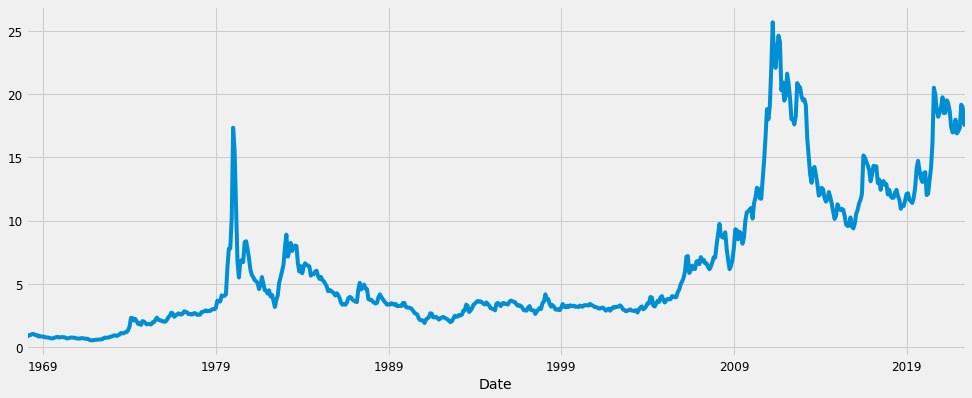

In [37]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

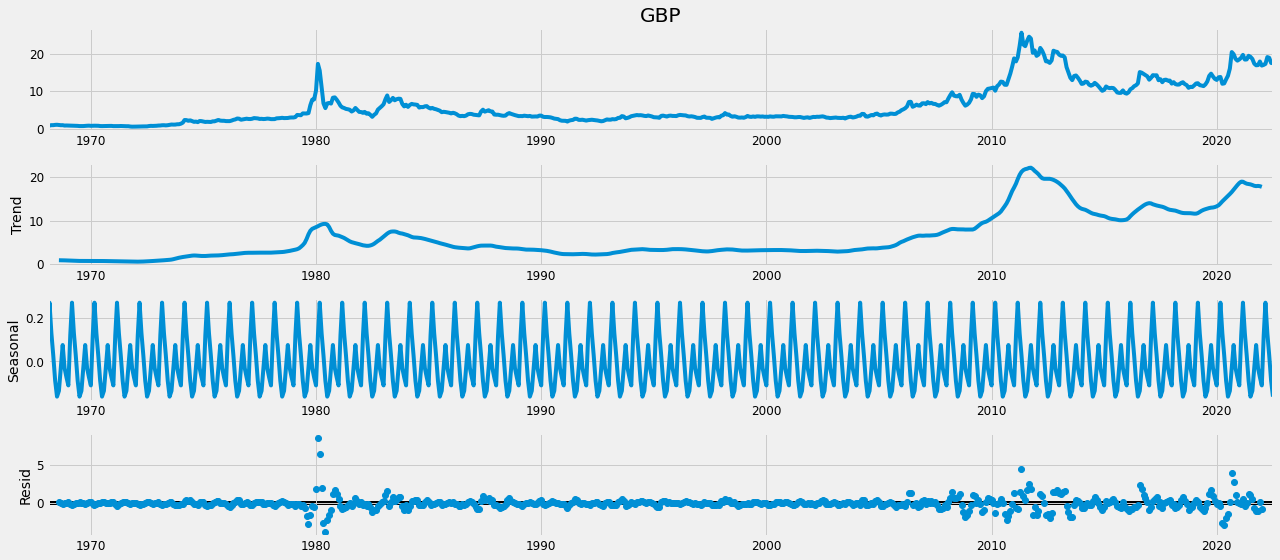

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4611.3360552844915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3890.6941911419867
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3009.0414111782984
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2966.5396986155647
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3014.627058242745
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3012.9356461677407
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2970.258673687041
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2963.0261925529394
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3748.0387296987437
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3093.118996901655
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2329.249059749416
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2291.4593444282777
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2335.3859877815476
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2327.204506431868
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2301.0802453763135
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2282.3910457882957
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1413.541970607413
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1401.371863570627

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1405.106879684431
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1809.9341815904654
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1411.9504072926684
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1404.5526019002818
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1406.5515118277067
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1641.298042716796
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1413.950518868263
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1358.178572998307


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1348.1022677107917
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1738.6286295108762
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1355.8745913950759
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1348.187598327226
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1349.0895279100646
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1577.6472874565538
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1357.8747515908212
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1374.1442243940728
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1362.7244562817064
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1792.8890435401845
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1373.237197865304
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1362.7247366528502
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1364.7242217982728
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1616.2080948605071
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1375.2375103295797
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1355.0959270533617
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1344.0262228468862
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1777.12698252

In [41]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [42]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1512      0.042     -3.592      0.000      -0.234      -0.069
ma.L1          0.4621      0.042     10.875      0.000       0.379       0.545
ma.S.L12      -0.0058      0.029     -0.199      0.842      -0.063       0.051
sigma2         0.4737      0.008     56.048      0.000       0.457       0.490


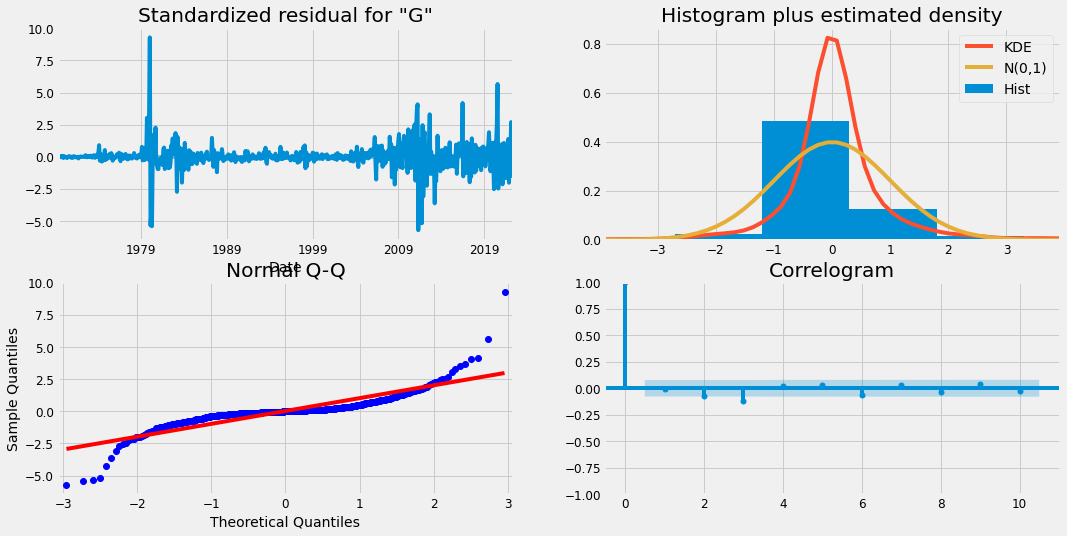

In [43]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts

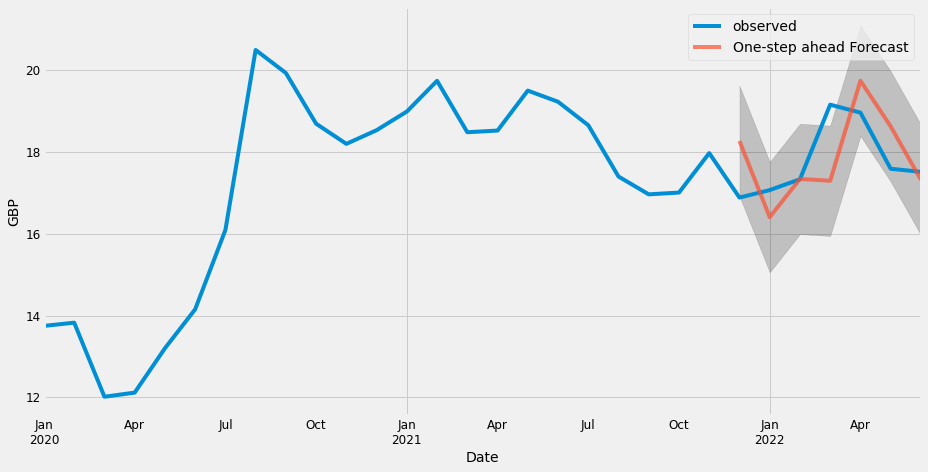

In [54]:
pred = results.get_prediction(start=pd.to_datetime('2021-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GBP')
plt.legend()

plt.show()

### The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [55]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2021-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.08


In [56]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.04


# Producing and visualizing forecasts

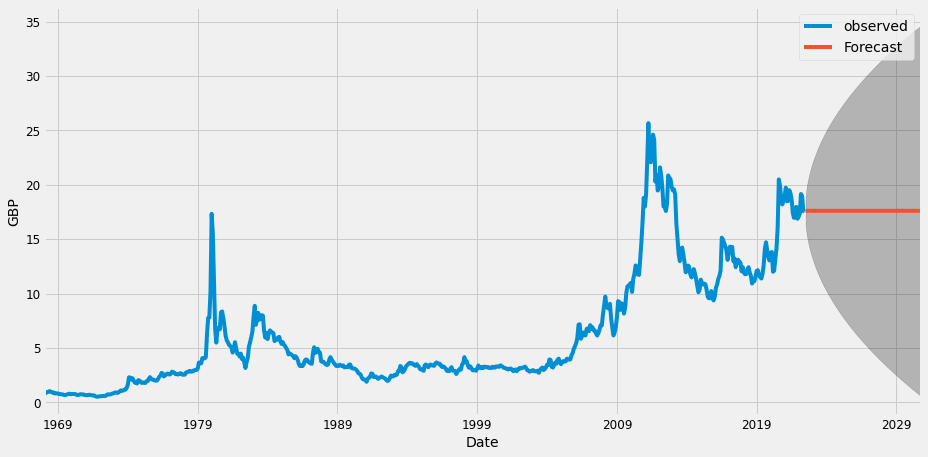

In [57]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('GBP')

plt.legend()
plt.show()